In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("hour.csv")
data.head(10)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
target=data["registered"] 

In [4]:
features = data.drop(columns= ["registered"])
features.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [5]:
def label_encoder(data, column_name):
    # Transforme un type cat´egorie en entier
    le = LabelEncoder()
    # On r´ecup`ere tous les noms de cat´egories possibles
    unique_values = list(data[column_name].unique())
    le_fitted = le.fit(unique_values)
    # On liste l’ensemble des valeurs
    values = list(data[column_name].values)
    # On transforme les cat´egories en entier
    values_transformed = le.transform(values)
    # On fait le remplacement de la colonne dans
    # le dataframe d’origine
    data[column_name] = values_transformed

In [6]:
label_encoder(features,"dteday")
features.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,16
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,40
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,32
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,13
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [7]:
y=target
X=features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [25]:
model = MLPRegressor(hidden_layer_sizes=(10,10),activation="relu",solver="adam", max_iter=1000,random_state=42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [26]:
y_pred=model.predict(X_test)

In [27]:
mean_absolute_error(y_test,y_pred)

0.07879646612348867

In [29]:
mean_squared_error(y_test,y_pred)

0.015188421298124413

In [31]:
r2_score(y_test,y_pred)

0.9999993434594482

In [12]:
model.score(X_train, y_train)

0.9999993266263936

In [13]:
model.score(X_test, y_test)

0.9999993434594482

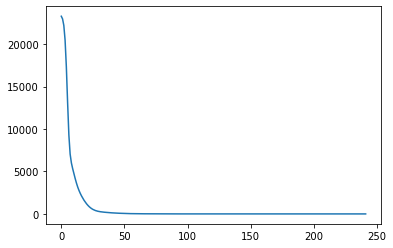

In [18]:
plt.plot(model.loss_curve_)
plt.show()